In [ ]:
#importing all dependecies 
import pandas as pd 
import numpy as np 
import plotly.express as px 
import plotly.graph_objects as go 

from sklearn import (model_selection,ensemble,linear_model,
                     decomposition,neighbors,naive_bayes,preprocessing)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/dataset/SBAnational.csv','r') as f:
  data = pd.read_csv(f)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
with open('/content/drive/My Drive/dataset/SBAnational.csv','r') as f:
  data = pd.read_csv(f)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



#### Data Understanding

In [ ]:
data.head()


LoanNr_ChkDgt                           Name  ... payment_deadline IsInRecession
0     1000014003                 ABC HOBBYCRAFT  ...       2006-02-28             0
1     1000024006    LANDMARK BAR & GRILLE (THE)  ...       2002-05-31             0
2     1000034009          WHITLOCK DDS, TODD M.  ...       2012-12-31             0
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  ...       2002-06-30             0
4     1000054004    ANASTASIA CONFECTIONS, INC.  ...       2017-05-14             0

[5 rows x 35 columns]

In [ ]:
data.describe()

LoanNr_ChkDgt            Zip  ...  FranchiseCode     UrbanRural
count   8.991640e+05  899164.000000  ...  899164.000000  899164.000000
mean    4.772612e+09   53804.391241  ...    2753.725933       0.757748
std     2.538175e+09   31184.159152  ...   12758.019136       0.646436
min     1.000014e+09       0.000000  ...       0.000000       0.000000
25%     2.589758e+09   27587.000000  ...       1.000000       0.000000
50%     4.361439e+09   55410.000000  ...       1.000000       1.000000
75%     6.904627e+09   83704.000000  ...       1.000000       1.000000
max     9.996003e+09   99999.000000  ...   99999.000000       2.000000

[8 rows x 10 columns]

In [ ]:
data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
data.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

### Data Casting

In [ ]:
data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

#### Columns Classification

In [ ]:
#classifying columns 
date_columns = ["ApprovalDate",'ChgOffDate', 'DisbursementDate']
currency_features = [ 'DisbursementGross','BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
continous_columns = ['Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob']
categorical_columns = ['Name', 'City', 'State', 'Zip', 'Bank', 'BankState','NAICS', 'UrbanRural', 'RevLineCr','LowDoc'] 
identifier_columns = ['LoanNr_ChkDgt','Zip','Name']



#### Changing Format of Date Columns

In [ ]:
#changing date column from string to datetime 
for col in date_columns : 
    data.loc[:,col] = pd.to_datetime(data.loc[:,col])
data.loc[:,date_columns]

ApprovalDate ChgOffDate DisbursementDate
0        1997-02-28        NaT       1999-02-28
1        1997-02-28        NaT       1997-05-31
2        1997-02-28        NaT       1997-12-31
3        1997-02-28        NaT       1997-06-30
4        1997-02-28        NaT       1997-05-14
...             ...        ...              ...
899159   1997-02-27        NaT       1997-09-30
899160   1997-02-27        NaT       1997-10-31
899161   1997-02-27        NaT       1997-09-30
899162   1997-02-27 2000-03-08       1997-03-31
899163   1997-02-27        NaT       1997-05-31

[899164 rows x 3 columns]

#### NAICS feature handling

In [ ]:
data['NAICS'].value_counts()
#
def map_NAICS(text) : 
    'this function was created to pick 2 first digit in order for latter sector classification ' 
    text = text[:2]
    if text == '0' : 
        return np.nan
    else : 
        return text
#fix the NAICS formatting by taking 2 first digit of previous NAICS 
data.loc[:,'NAICS'] = data.loc[:,'NAICS'].astype('str').apply(lambda x : map_NAICS(x))
# data.head()

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
315240         1
313310         1
311311         1
111130         1
212231         1
Name: NAICS, Length: 1312, dtype: int64

In [ ]:
data.loc[:,'NAICS'].value_counts()

44    84737
81    72618
54    68170
72    67600
23    66646
62    55366
42    48743
45    42514
33    38284
56    32685
48    20310
32    17936
71    14640
53    13632
31    11809
51    11379
52     9496
11     9005
61     6425
49     2221
21     1851
22      663
55      257
92      229
Name: NAICS, dtype: int64

#### Handling ApprovalFY feature

In [ ]:
print('before type fix : ')
data['ApprovalFY'].unique()
# since the dataset has some values with string we need to convert to integer
data.loc[:,'ApprovalFY'].replace({'1976A':1976},inplace=True)
data.loc[:,'ApprovalFY'] = data.loc[:,'ApprovalFY'].astype('int')
print('asfter type fix : ')
data['ApprovalFY'].unique()

before type fix : 


array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

asfter type fix : 


array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971])

#### Handling Currency Features 
'DisbursementGross','BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv

In [ ]:
print('before type casting')
data.loc[:,currency_features]
#based on obsevation the currency feature has been formated in string, so we need to remove the symbol and cast into float type for latter use 

data.loc[:,currency_features] = data.loc[:,currency_features].replace('[\$,]', '', regex=True).astype(float)
print('after type casting')
data.loc[:,currency_features]

before type casting


DisbursementGross BalanceGross ChgOffPrinGr        GrAppv      SBA_Appv
0            $60,000.00        $0.00        $0.00    $60,000.00    $48,000.00 
1            $40,000.00        $0.00        $0.00    $40,000.00    $32,000.00 
2           $287,000.00        $0.00        $0.00   $287,000.00   $215,250.00 
3            $35,000.00        $0.00        $0.00    $35,000.00    $28,000.00 
4           $229,000.00        $0.00        $0.00   $229,000.00   $229,000.00 
...                  ...          ...          ...           ...           ...
899159       $70,000.00        $0.00        $0.00    $70,000.00    $56,000.00 
899160       $85,000.00        $0.00        $0.00    $85,000.00    $42,500.00 
899161      $300,000.00        $0.00        $0.00   $300,000.00   $225,000.00 
899162       $75,000.00        $0.00   $46,383.00    $75,000.00    $60,000.00 
899163       $30,000.00        $0.00        $0.00    $30,000.00    $24,000.00 

[899164 rows x 5 columns]

after type casting


DisbursementGross  BalanceGross  ChgOffPrinGr    GrAppv  SBA_Appv
0                 60000.0           0.0           0.0   60000.0   48000.0
1                 40000.0           0.0           0.0   40000.0   32000.0
2                287000.0           0.0           0.0  287000.0  215250.0
3                 35000.0           0.0           0.0   35000.0   28000.0
4                229000.0           0.0           0.0  229000.0  229000.0
...                   ...           ...           ...       ...       ...
899159            70000.0           0.0           0.0   70000.0   56000.0
899160            85000.0           0.0           0.0   85000.0   42500.0
899161           300000.0           0.0           0.0  300000.0  225000.0
899162            75000.0           0.0       46383.0   75000.0   60000.0
899163            30000.0           0.0           0.0   30000.0   24000.0

[899164 rows x 5 columns]

#### Handling LowDoc Feature

In [ ]:
print('before casting :')
data.LowDoc.unique()
#based on dataset explanation the LowDoc required to be filled with Y or N so we need to handle the unusual 
# in this case i will consider that as error, and convert to missing values or nan

#fixing irregular unique values from LowDoc features
def cast_LowDoc(text) : 
    to_be_casted = [ 'C', '1', 'S', 'R', 'A', '0']
    if text == np.nan : 
        return np.nan
    elif text not in to_be_casted : 
        return text
    else : 
        return np.nan
    
data.loc[:,'LowDoc'] = data.loc[:,'LowDoc'].apply(lambda x : cast_LowDoc(x))
print('after casting :')
data.LowDoc.unique()


before casting :


array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

after casting :


array(['Y', 'N', nan], dtype=object)

#### Handling RevLineCr Feature

In [ ]:
print('before casting :')
data.RevLineCr.unique()
#based on dataset explanation the RevLineCr required to be filled with Y or N so we need to handle the unusual 
# in this case i will consider that as error, and convert to missing values or nan

#fixing irregular unique values from RevLineCr features
def cast_RevLineCr(text) : 
            to_be_casted = [ '0', 'T', '`', ',', '1', 'C', '3', '2', 'R', '7',
                            'A', '5', '.', '4', '-', 'Q']
            if text == np.nan : 
                return np.nan
            elif text not in to_be_casted : 
                return text
            else : 
                text = np.nan
                return text
data.loc[:,'RevLineCr'] = data.loc[:,'RevLineCr'].apply(lambda x : cast_RevLineCr(x))
print('after casting :')
data.RevLineCr.unique()


before casting :


array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

after casting :


array(['N', nan, 'Y'], dtype=object)

#### Handling NewExist Feature

In [ ]:
print('before casting :')
data.NewExist.unique()
#based on dataset explanation the NewExist required to be filled with  1 means Existing business, 2 means New business so we need to handle the unusual 
# in this case i will consider that as error, and convert to missing values or nan

#fixing irregular unique values from LowDoc features
data.loc[:,'NewExist'] = data.loc[:,'NewExist'].replace({1.0: "N", 2.0:"Y", 0:np.nan})
# as the dataset explanation told us that NewExist means whether the business new or not, we are going to rename for clearer naming
data.rename(columns={'NewExist' : 'IsNewBusiness'},inplace=True)
# 
print('after casting :')
data.IsNewBusiness.unique()


before casting :


array([ 2.,  1.,  0., nan])

after casting :


array(['Y', 'N', nan], dtype=object)

#### Handling FranchiseCode Feature

In [ ]:
print(' FranchiseCode feature before casting :')
data.FranchiseCode.unique()
#from the dataset explanation a company can be determined whether a franchise or noy by the code if 00000, 00001 mean No Franchise while the rest is franchise
# to solve this we need to cast the feature
def cast_FranchiseCode(text) : 
    if text == '0' or text == '1' : 
        return 'N' 
    else : 
        return 'Y'
data.loc[:,'FranchiseCode'] = data.loc[:,'FranchiseCode'].astype('str').apply( lambda x : cast_FranchiseCode(x))
#changing column name for better understanding
data.rename(columns={'FranchiseCode' : 'IsFranchise'},inplace=True)
print(' FranchiseCode feature after casting :')
data.IsFranchise.unique()

 FranchiseCode feature before casting :


array([    1,     0, 15100, ...,  2899, 18701, 15930])

 FranchiseCode feature after casting :


array(['N', 'Y'], dtype=object)

#### Handling UrbanRural Feature

In [ ]:
print('UrbanRural before casting :')
data.UrbanRural.unique()
#based on dataset explanation the UrbanRural required to be filled with  1 means  Urban, 2 means Rural and 0 as undefined so we need to handle the unusual 
# in this case i will consider that as error, and convert to missing values or nan

#replacing number based to Y / N form 
data.rename(columns={'UrbanRural' : 'IsUrban'},inplace=True)
data.loc[:,'IsUrban'] = data.loc[:,'IsUrban'].replace({1.0: "Y", 2.0:"N", 0:np.nan})

print('UrbanRural after casting :')
data.IsUrban.unique()


UrbanRural before casting :


array([0, 1, 2])

UrbanRural after casting :


array([nan, 'Y', 'N'], dtype=object)

### Handling Missing Values

In [ ]:
#missing values in our dataset in pct 
data.isnull().sum()/data.shape[0]


LoanNr_ChkDgt        0.000000
Name                 0.000016
City                 0.000033
State                0.000016
Zip                  0.000000
Bank                 0.001734
BankState            0.001742
NAICS                0.224595
ApprovalDate         0.000000
ApprovalFY           0.000000
Term                 0.000000
NoEmp                0.000000
IsNewBusiness        0.001301
CreateJob            0.000000
RetainedJob          0.000000
IsFranchise          0.000000
IsUrban              0.359408
RevLineCr            0.308597
LowDoc               0.006681
ChgOffDate           0.819055
DisbursementDate     0.002634
DisbursementGross    0.000000
BalanceGross         0.000000
MIS_Status           0.002221
ChgOffPrinGr         0.000000
GrAppv               0.000000
SBA_Appv             0.000000
dtype: float64

#### Handling Missing MIS_Status

In [ ]:
#based on dataset guideline MIS_Status means whether or not the debitor failed to pay full or not 
#if the debitor doesnot have issing values on ChgOffDate it means the debitor fail to paid in full amount 
#so we can impute with CHGOFF
data.loc[(data['MIS_Status'].isnull()) & (data["ChgOffDate"].isnull()==False), "MIS_Status"] = "CHGOFF"

In [ ]:
#missing values in our dataset in pct after dropping MIS_Status' missing values
data.isnull().sum()


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                201948
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
IsNewBusiness          1170
CreateJob                 0
RetainedJob               0
IsFranchise               0
IsUrban              323167
RevLineCr            277479
LowDoc                 6007
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1736
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Handling Missing LowDocs

In [ ]:
#imputing missing values of LowDocs
# AGAIN . 
# based on data guideline LowDoc mean application process if LowDoc is Y = one page application 
# this LowDoc was determined by the amount of Disbursement Gross 
# if >= USD 150K -> LowDoc -> N otherwise Y
data.loc[(data['LowDoc'].isnull()) & (data['DisbursementGross'] < 150000), "LowDoc"] = "Y"
data.loc[(data['LowDoc'].isnull()) & (data['DisbursementGross'] >= 150000), "LowDoc"] = "N"
data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                201948
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
IsNewBusiness          1170
CreateJob                 0
RetainedJob               0
IsFranchise               0
IsUrban              323167
RevLineCr            277479
LowDoc                    0
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1736
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Handling Missing NAICS

In [ ]:
#Imputing NAICS 
# there is no spesific explanation about NAICS classification 
# several option to take to imput missing values : Mode Imputation 

mode_NAICS = data.loc[:,'NAICS'].mode()[0]
data.loc[:,'NAICS'].fillna(mode_NAICS,inplace=True)


#### Handling Missing Bank and BankState

In [ ]:
#since Bank and BankState is a pair and probably has pattern 
# we going to fill the missing values by mode with a bit conditional ()
bank_mode = data.loc[:,'Bank'].mode()[0]
data.loc[:,'Bank'] = data.loc[:,'Bank'].fillna(bank_mode)
# we are going to impute bank state by first mode of BankState from first mode of Bank Name
data.loc[data['BankState'].isnull()==True, "BankState"] = data[data.Bank == data.Bank.mode()[0]]['BankState'].mode()[0]

In [ ]:
#checking missing values again 
data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
IsNewBusiness          1170
CreateJob                 0
RetainedJob               0
IsFranchise               0
IsUrban              323167
RevLineCr            277479
LowDoc                    0
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1736
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Handling Missing City and State

In [ ]:
#imputing missing city and state 
#creating dictionary city of every state
codified_city_state = {}
for st in data.State.unique() : 
    codified_city_state[st] = set(data[data.State==st]['City'].to_list())
#filling missing state by refering to its city from codified_city_state
for k,v in codified_city_state.items() : 
    for city in data[data.State.isnull()==True]['City'] :
        #checking if city in missing state has similarity 
        if set(city).intersection(v) is not None : 
            data.loc[ (data["State"].isnull()==True), "State"] = k
            print('State Imputed')
        else : 
            continue
#filling missing city by taking mode of its' state       
for state in data[data.City.isnull()==True]['State'] : 
    city_mode = data.loc[data.State==state]['City'].mode()[0]
    data.loc[ (data["City"].isnull()==True), "City"] = city_mode
    print('City Imputed')
    


State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
State Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed
City Imputed


In [ ]:
data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
IsNewBusiness          1170
CreateJob                 0
RetainedJob               0
IsFranchise               0
IsUrban              323167
RevLineCr            277479
LowDoc                    0
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1736
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Handling Missing IsNewBusiness

In [ ]:
#imputing missing values from IsNewBusiness with its mode
data.loc[:,'IsNewBusiness'].fillna(data.loc[:,'IsNewBusiness'].mode()[0],inplace=True)

#### Handling Missing RevLineCr

In [ ]:
data.loc[:,'RevLineCr'].fillna(data.loc[:,'RevLineCr'].mode()[0],inplace=True)

#### Handling Missing RevLineCr

In [ ]:
data.loc[:,'IsUrban'].fillna(data.loc[:,'IsUrban'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
IsNewBusiness             0
CreateJob                 0
RetainedJob               0
IsFranchise               0
IsUrban                   0
RevLineCr                 0
LowDoc                    0
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1736
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

#### Dropna subset MIS_Status, DisbursementDate, 
#### Drop ChgOffDate 

In [ ]:
data.dropna(subset=['MIS_Status','DisbursementDate'],inplace=True)
data.drop('ChgOffDate',axis=1,inplace=True)


In [ ]:
data.dropna(subset=['Name'],inplace=True)

In [ ]:
data.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
IsNewBusiness        0
CreateJob            0
RetainedJob          0
IsFranchise          0
IsUrban              0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

### Feature Engineering

#### Creating Sector Feature

In [ ]:
#based on dataset guideline we can map our NAICS code to sector 
#define CONSTANT such as dataset mapping 
# sector map is based on dataset explanation (.pdf file)
sector_map = {
    '11' : 'Agriculture,forestry,fishing,and hunting', 
    '21' : 'Mining,quarrying,and oil and gas extraction', 
    '22' : 'Utilities', 
    '23' : 'Construction', 
    '31' : 'Manufacturing','32' : 'Manufacturing','33' : 'Manufacturing' , 
    '42' : 'Wholesale Trade' , 
    '44' : 'RetailTrade' , '45' : 'RetailTrade', 
    '48' : 'Transportation and Warehousing' , '49' : 'Transportation and Warehousing', 
    '51' : 'Information', '52' : 'Finance and Insurance' , 
    '53' : 'Real Estate, Rental, and Leasing' , 
    '54' : 'Professional, scientific, and technical services', 
    '55' : 'Management of companies and enterprises' , 
    '56' : 'Administrative and support and waste management and remediation services',
    '61' : 'Educational services' , 
    '62' : 'Health care and social assistance' , 
    '71' : 'Arts, entertainment, and recreation' , 
    '72' : 'Accommodation and food services' , 
    '81' : 'Other services (edataept public administration)',
    '92' : 'Public administration', 
    np.nan : np.nan
}

#default rate from each sector, the information was retrieved from Dataset explanation 



data.loc[:,'Sector'] = data.loc[:,'NAICS'].map(sector_map)
data.loc[:,'Sector'].value_counts()



RetailTrade                                                                 328154
Other services (edataept public administration)                              72249
Manufacturing                                                                67760
Professional, scientific, and technical services                             67621
Accommodation and food services                                              67413
Construction                                                                 66295
Health care and social assistance                                            55095
Wholesale Trade                                                              48515
Administrative and support and waste management and remediation services     32416
Transportation and Warehousing                                               22362
Arts, entertainment, and recreation                                          14586
Real Estate, Rental, and Leasing                                             13569
Info

#### Creating Sector Default Rate

In [ ]:
# based on guideline each sector has its own potentianl risk 
default_map_sector = {
    '21' : 8 , 
    '11' : 9 , 
    '55' : 10 , '62' : 10 , 
    '22' : 14 , 
    '92' : 15 , 
    '54' : 19 , '42' : 19 , '31' : 19 , 
    '32' : 16,
    '33' : 14 , 
    '81' : 20 , 
    '71' : 22 , 
    '72' : 22 , 
    '44' : 22 , 
    '45' : 23 , 
    '23' : 23 , 
    '56' : 24 , 
    '61' : 24 , 
    '51' : 25 , 
    '48' : 27 , 
    '49' : 23 , 
    '52' : 28 , 
    '53' : 29 , 
    np.nan : np.nan
    
}
data.loc[:,'default_rate_sector'] = data.loc[:,'NAICS'].map(default_map_sector)/100
data.loc[:,'default_rate_sector']

0         0.23
1         0.22
2         0.10
3         0.22
4         0.22
          ... 
899159    0.23
899160    0.23
899161    0.14
899162    0.22
899163    0.22
Name: default_rate_sector, Length: 895163, dtype: float64

#### Creating State Default Rate

In [ ]:
# we are going to create another feature => default rate of each state 
#default rate could be defined by pct CHGOFF from total loan in each state
# group first the state and MIS_Status
mis_group_states= data.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
# grouping rsult multiindex -> so we need to convert to single index 
mis_group_states.columns = mis_group_states.columns.get_level_values(0)
#create feature of default rate of each state
mis_group_states['DefaultRate'] = mis_group_states['CHGOFF'] / (mis_group_states['CHGOFF']+mis_group_states['P I F'])
default_rate_state = mis_group_states.loc[:,['DefaultRate']].to_dict()['DefaultRate']
default_rate_state
# map the default rate 
data.loc[:,'default_rate_state'] = data.loc[:,'State'].map(default_rate_state)

{'AK': 0.1139874739039666,
 'AL': 0.16596814752724226,
 'AR': 0.16774703557312254,
 'AZ': 0.20797039567321376,
 'CA': 0.18523609500625848,
 'CO': 0.17825346630990027,
 'CT': 0.14113269946258786,
 'DC': 0.238954573739888,
 'DE': 0.18015546410608138,
 'FL': 0.2744037613583766,
 'GA': 0.2395317424583521,
 'HI': 0.15247634947134112,
 'IA': 0.11519505471556261,
 'ID': 0.14089709762532981,
 'IL': 0.22676706010039344,
 'IN': 0.17662540901977522,
 'KS': 0.13083377031987414,
 'KY': 0.19382459782044628,
 'LA': 0.1813422678253586,
 'MA': 0.13039830610043546,
 'MD': 0.19751778416830634,
 'ME': 0.09863198783989191,
 'MI': 0.2259184971381048,
 'MN': 0.11696002632011844,
 'MO': 0.15262290313196936,
 'MS': 0.1589395324539637,
 'MT': 0.0680045871559633,
 'NC': 0.19284963196635121,
 'ND': 0.07686424474187381,
 'NE': 0.11374705420267085,
 'NH': 0.10791426903510967,
 'NJ': 0.20141121456306627,
 'NM': 0.10957765214499501,
 'NV': 0.23223873142714446,
 'NY': 0.20003494365335897,
 'OH': 0.16490903484428,
 'OK

#### Creating Total Risk Default

In [ ]:
# now we are going to create each loan default risk by adding state risk + sector risk
data.loc[:,'pct_risk_default'] = data.loc[:,'default_rate_state'] + data.loc[:,'default_rate_sector']

#### Creating isBackedRealEstate

In [ ]:
# the dataset also mention that if the loan term exceed 240 months it should be backed with real estate
def is_backed_RealEstate(length) : 
    if length >= 240 : 
        return "Y"
    else : 
        return "N"
    
data.loc[:,'BackedRealEstate'] = data.loc[:,'Term'].apply(lambda x : is_backed_RealEstate(x))
data.loc[:,'BackedRealEstate'].value_counts()


N    743096
Y    152067
Name: BackedRealEstate, dtype: int64

####  Creating SBA_guaranted_pct  Feature

In [ ]:
# based on the guidelines the the SBA can give different loan guarantee
data['SBA_guaranted_pct'] = data['SBA_Appv'] / data['GrAppv']

####  Creating IsInRecession  Feature

In [ ]:
from dateutil.relativedelta import relativedelta

# based on the guideline again the dataset has long time frame from 70s to 2014
# and we have been encountered recessions so of course in recession era loan tend to become more unpaid
# we are going to classify whether a loan is between recession date 
# first create deadline payment as point of active loan 
# converting term in months to relative ( to add date format with disbursment date)
data.loc[:,'relative_delta'] = data.loc[:,'Term'].apply(lambda x : pd.DateOffset(months=x))
data.loc[:,'payment_deadline'] = data.loc[:,'relative_delta'] + data.loc[:,'DisbursementDate']
recession_begin = pd.Timestamp(2007, 12, 31)
recession_end = pd.Timestamp(2009, 6, 30)

def is_inRecession(date) : 
    if date <= recession_end and date >= recession_begin : 
        return 1
    elif date == np.nan : 
        return np.nan 
    else : 
        return 0
    
data.loc[:,'IsInRecession'] = data.loc[:,'payment_deadline'].apply(lambda x : is_inRecession(x))


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning:

Adding/subtracting object-dtype array to DatetimeArray not vectorized



In [ ]:
data.loc[:,'IsInRecession'].value_counts()

0    825225
1     69938
Name: IsInRecession, dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0]

LoanNr_ChkDgt          0.0
Name                   0.0
City                   0.0
State                  0.0
Zip                    0.0
Bank                   0.0
BankState              0.0
NAICS                  0.0
ApprovalDate           0.0
ApprovalFY             0.0
Term                   0.0
NoEmp                  0.0
IsNewBusiness          0.0
CreateJob              0.0
RetainedJob            0.0
IsFranchise            0.0
IsUrban                0.0
RevLineCr              0.0
LowDoc                 0.0
DisbursementDate       0.0
DisbursementGross      0.0
BalanceGross           0.0
MIS_Status             0.0
ChgOffPrinGr           0.0
GrAppv                 0.0
SBA_Appv               0.0
Sector                 0.0
default_rate_sector    0.0
default_rate_state     0.0
pct_risk_default       0.0
BackedRealEstate       0.0
SBA_guaranted_pct      0.0
relative_delta         0.0
payment_deadline       0.0
IsInRecession          0.0
dtype: float64

#### Inspect Unique Values

In [ ]:
for col in data.columns : 
    # we want to know each column uniqueness 
    #looping over all columns in our data 
    print(f'{col} feature has {data[col].nunique()}  values ')
'''
feature to be dropped with reason : 
1. LoanNr_ChkDgt (ID) -> high uniqueness (high cardinality)
2.Name -> high uniqueness (high cardinality)
3. Zip (we have another geo data such as city and State)
5. date columsn -> when we are going to start modelling 

before EDA phase we are going to remove columns = ['LoanNr_ChkDgt','Name','Zip','Charge,'ChgOffDate']
and also the column that involved as medium of feature engineering such as - > relative_delta
'''
#drop features with high cardinalities 
# data.drop(['LoanNr_ChkDgt','Names','Zip'],axis=1,inplace=True)

LoanNr_ChkDgt feature has 895163  values 
Name feature has 777100  values 
City feature has 32544  values 
State feature has 51  values 
Zip feature has 33584  values 
Bank feature has 5798  values 
BankState feature has 56  values 
NAICS feature has 24  values 
ApprovalDate feature has 9827  values 
ApprovalFY feature has 48  values 
Term feature has 412  values 
NoEmp feature has 598  values 
IsNewBusiness feature has 2  values 
CreateJob feature has 246  values 
RetainedJob feature has 357  values 
IsFranchise feature has 2  values 
IsUrban feature has 2  values 
RevLineCr feature has 2  values 
LowDoc feature has 2  values 
DisbursementDate feature has 8472  values 
DisbursementGross feature has 118094  values 
BalanceGross feature has 15  values 
MIS_Status feature has 2  values 
ChgOffPrinGr feature has 82994  values 
GrAppv feature has 22094  values 
SBA_Appv feature has 38266  values 
Sector feature has 20  values 
default_rate_sector feature has 15  values 
default_rate_state 

"\nfeature to be dropped with reason : \n1. LoanNr_ChkDgt (ID) -> high uniqueness (high cardinality)\n2.Name -> high uniqueness (high cardinality)\n3. Zip (we have another geo data such as city and State)\n5. date columsn -> when we are going to start modelling \n\nbefore EDA phase we are going to remove columns = ['LoanNr_ChkDgt','Name','Zip','Charge,'ChgOffDate']\nand also the column that involved as medium of feature engineering such as - > relative_delta\n"

In [ ]:
data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'IsNewBusiness',
       'CreateJob', 'RetainedJob', 'IsFranchise', 'IsUrban', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Sector',
       'default_rate_sector', 'default_rate_state', 'pct_risk_default',
       'BackedRealEstate', 'SBA_guaranted_pct', 'relative_delta',
       'payment_deadline', 'IsInRecession'],
      dtype='object')

In [ ]:
# dropping some columns before EDA 
# before EDA phase we are going to remove columns = ['LoanNr_ChkDgt','Name','Zip','Charge,'ChgOffDate']
# and also the column that involved as medium of feature engineering such as - > relative_delta
# cols_to_drop = ['LoanNr_ChkDgt','Name','Zip','ChgOffDate','relative_delta']
# data.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
#create checkpoint for EDA
# data.to_csv('for_EDA.csv',index=False)
eda_purpose = data

In [ ]:
#
fig_state = px.bar(eda_purpose,y='City',color='City')

KeyboardInterrupt: ignored

In [ ]:
fig_state.show()

In [ ]:
eda_purpose.to_csv('eda_data.csv',index=False)
from google.colab import files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('eda_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
eda_purpose.shape

(895163, 35)

In [ ]:
eda_purpose.head()

LoanNr_ChkDgt                           Name  ... payment_deadline IsInRecession
0     1000014003                 ABC HOBBYCRAFT  ...       2006-02-28             0
1     1000024006    LANDMARK BAR & GRILLE (THE)  ...       2002-05-31             0
2     1000034009          WHITLOCK DDS, TODD M.  ...       2012-12-31             0
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  ...       2002-06-30             0
4     1000054004    ANASTASIA CONFECTIONS, INC.  ...       2017-05-14             0

[5 rows x 35 columns]

<Figure size 1440x720 with 0 Axes>

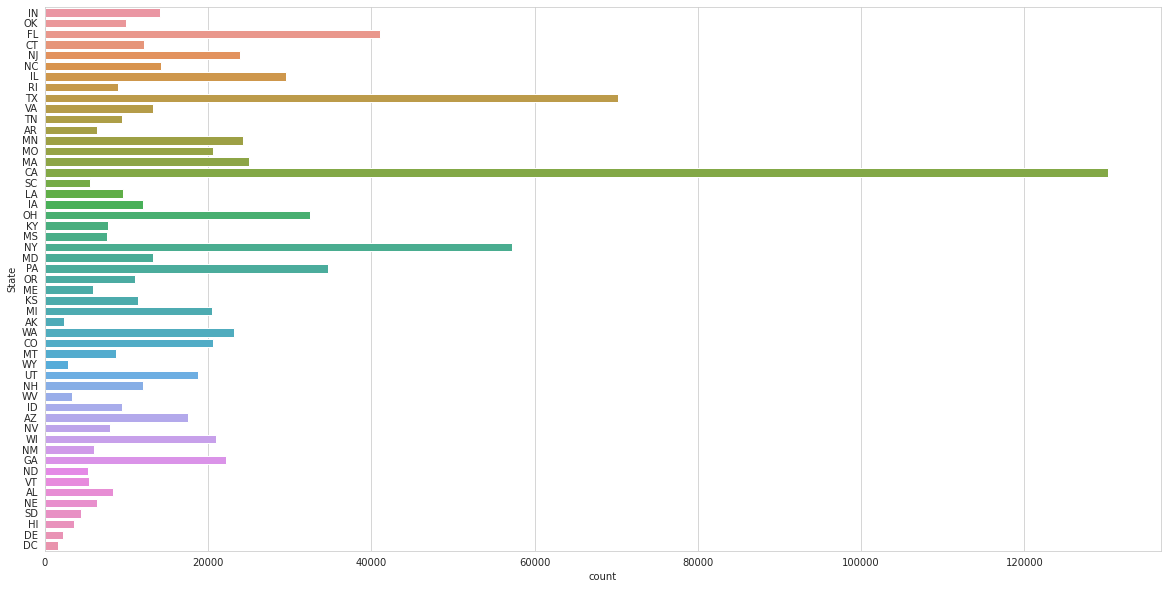

In [ ]:
### 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(y=eda_purpose['State'])


<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Loan Data Correlation')

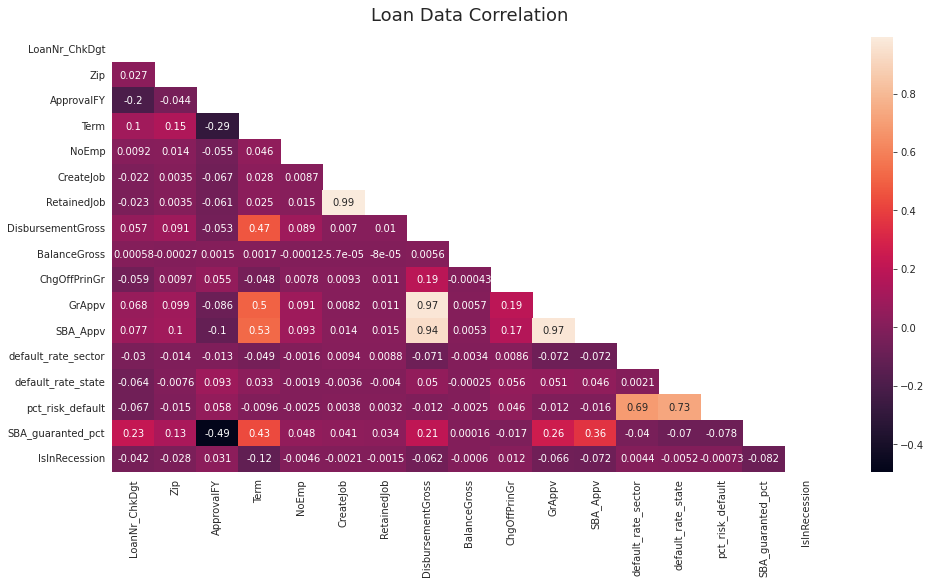

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Correlation Analysis

plt.figure(figsize=(16, 8))

# Create mask for diagonal correlation plot
mask = np.triu(np.ones_like(eda_purpose.corr(), dtype=np.bool))

# Plot the heatmap
heatmap = sns.heatmap(eda_purpose.corr(), mask=mask, annot=True)
heatmap.set_title('Loan Data Correlation', fontdict={'fontsize':18}, pad=16)





In [ ]:
eda_purpose.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'IsNewBusiness',
       'CreateJob', 'RetainedJob', 'IsFranchise', 'IsUrban', 'RevLineCr',
       'LowDoc', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Sector',
       'default_rate_sector', 'default_rate_state', 'pct_risk_default',
       'BackedRealEstate', 'SBA_guaranted_pct', 'relative_delta',
       'payment_deadline', 'IsInRecession'],
      dtype='object')

<Figure size 864x1296 with 0 Axes>

Text(0.5, 1.0, 'Outliers Detection in Model ')

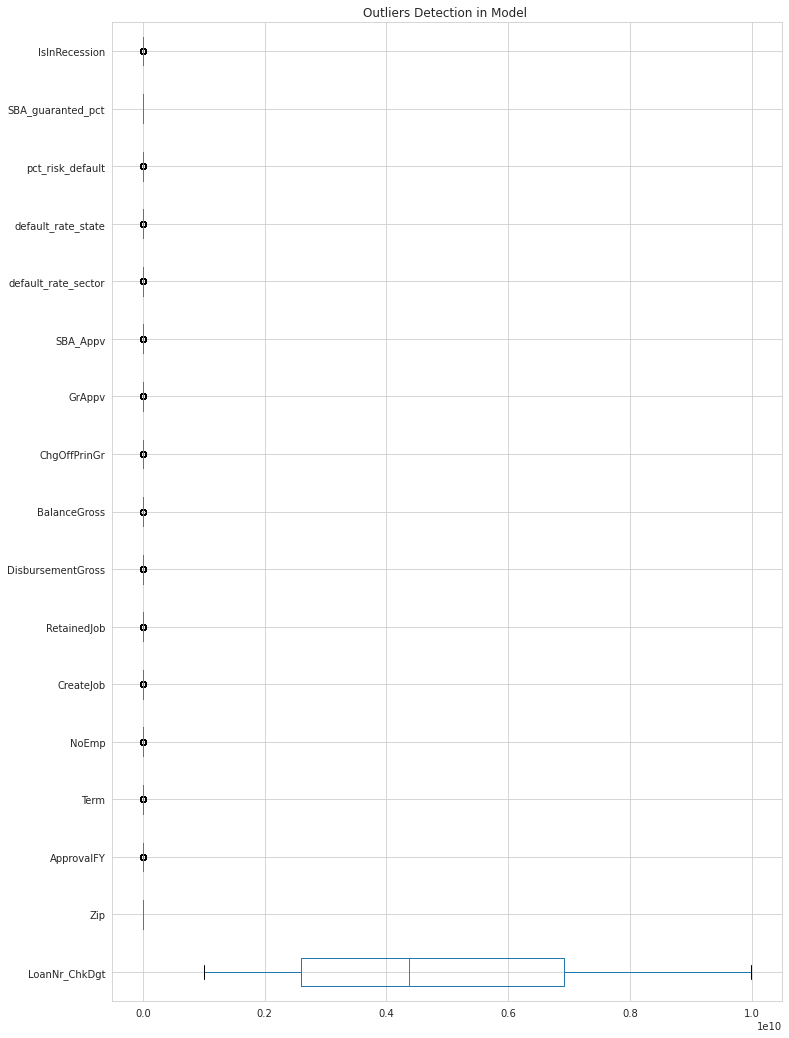

In [ ]:
#outlier checks
plt.figure(figsize=(12,18))
eda_purpose.boxplot(vert=False)


plt.title('Outliers Detection in Model ')
# most of variable contain the outlier is in currency feature -> in order to handle this we can do scaling before modelling with logaritmic transformation 
# since we are going to model using tree based model we dont need to scale the data cause the model itself is robust towards outliers


In [ ]:
#dropping date columns for modelling purpose -> 
data.drop(['ApprovalDate','DisbursementDate','NAICS','payment_deadline','BalanceGross'],axis=1,inplace=True)
# data.to_csv('modelling_purpose.csv',index=False)

### Modelling

###  Encoding The Categorical Features

In [ ]:
data.loc[:,'MIS_Status'].value_counts()

P I F     737747
CHGOFF    157416
Name: MIS_Status, dtype: int64

In [ ]:
# before we move to modelling phase we have to phase encoding section -> changing all input into number
#map target to 0 and 1 
data.loc[:,'MIS_Status'] = data.loc[:,'MIS_Status'].map({"P I F":1,"CHGOFF":0})


In [ ]:
# data.IsNewBusiness -> one hot encoding
# data.IsFranchise -> one hot encoding
# data.IsUrban-> one hot encoding
# data.RevLineCr -> one hot encoding
# data.LowDoc -> one hot encoding
cols_to_hot_encode = ['IsNewBusiness','IsFranchise','IsUrban','RevLineCr','LowDoc','BackedRealEstate']
def one_hot_encoding(data,cols) : 
    ''' 
    this function use pd.get_dummies and bit modification to concatenate back the data
    '''
    copy_data = data.copy()
    drop_columns = copy_data.drop(cols,axis=1)
    isolated_data = copy_data[cols]
    isolated_data = pd.get_dummies(isolated_data)
    encoded_data = pd.concat([drop_columns,isolated_data],axis=1)
    return encoded_data

In [ ]:
data = one_hot_encoding(data,cols_to_hot_encode)

In [ ]:
data.City.unique()

array(['EVANSVILLE', 'NEW PARIS', 'BLOOMINGTON', ..., 'MURFRECSBORO',
       'E WENALCHEE', 'SO. OZONE PARK'], dtype=object)

In [ ]:
#columns to reduce uniqueness - > 
from collections import Counter
import joblib 
col_to_reduce_cardinality = ['City','Bank']
def reduce_uniqueness(data,columns,save_feature_name=True,threshold=0.75) : 
    for col in columns : 
        row_limit = int(threshold*len(data[col]))
        feature_values = []
        row_count = 0 
        counts=Counter(data[col])
        for i,j in  counts.most_common() :
            row_count += dict(counts)[i]
            feature_values.append(i)
            if row_count >= row_limit : 
                break
        feature_values.append('Other')
        data.loc[:,col] = data.loc[:,col].apply(lambda x : x if x in feature_values else 'Other')

    return data



In [ ]:
data  = reduce_uniqueness(data,col_to_reduce_cardinality)

In [ ]:
data.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob',
       'DisbursementGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'Sector', 'default_rate_sector', 'default_rate_state',
       'pct_risk_default', 'SBA_guaranted_pct', 'relative_delta',
       'IsInRecession', 'IsNewBusiness_N', 'IsNewBusiness_Y', 'IsFranchise_N',
       'IsFranchise_Y', 'IsUrban_N', 'IsUrban_Y', 'RevLineCr_N', 'RevLineCr_Y',
       'LowDoc_N', 'LowDoc_Y', 'BackedRealEstate_N', 'BackedRealEstate_Y'],
      dtype='object')

In [ ]:
def download_map(data,col) : 
  import joblib
  from google.colab import files 
  map_col = {}
  for idx,value in enumerate(data[col].unique()) : 
    map_col[value] = idx
  joblib.dump(map_col,f'map_{col}.joblib')
  files.download(f'map_{col}.joblib')


In [ ]:
for col in ['City','State','Bank','BankState','Sector'] : 
  download_map(data,col)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#converting the high cardinality feature to one hot encoding 
col_onehot_encoding = ['City','State','Bank','BankState','Sector']
data = one_hot_encoding(data,col_onehot_encoding)

In [ ]:
#col to drop 
col_to_drop = ["LoanNr_ChkDgt" , "Name" , "Zip", 'relative_delta']
data.drop(col_to_drop,axis=1,inplace=True)

In [ ]:
data.to_csv('after_all_modification.csv',index=False)
from google.colab import files
files.download('after_all_modification.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#defined feature and target 
X  = data.drop('MIS_Status',axis=1)
y  = data.loc[:,'MIS_Status'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,y,test_size=0.2)

In [ ]:
!pip install catboost

In [ ]:
#calling several model 
from sklearn import linear_model,ensemble,neighbors,naive_bayes ,model_selection,metrics
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
list_of_models = [linear_model.LogisticRegression(), 
                  ensemble.RandomForestClassifier(),ensemble.AdaBoostClassifier(),
                  ensemble.GradientBoostingClassifier(),XGBClassifier(),neighbors.KNeighborsClassifier(),
                  naive_bayes.MultinomialNB(),LGBMClassifier(),CatBoostClassifier()]

#### Based Model Score

1. Logistic Regression
LogisticRegression as f1 score = 0.9894532670626742 and AUC ROC Score = 0.9957901249292681


2. RandomForest Classifier
RandomForestClassifier as f1 score = 0.9956011730205278 and AUC ROC Score = 0.9958150410721511

3. AdaBoost Classifier
AdaBoostClassifier()
AdaBoostClassifier as f1 score = 0.9969403989719741 and AUC ROC Score = 0.9977004987040883

4. GradientBoosting Classifier
GradientBoostingClassifier()
GradientBoostingClassifier as f1 score = 0.99608514803034 and AUC ROC Score = 0.9959653548521669

5. XGBoost Classifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGBClassifier as f1 score = 0.9968191827746514 and AUC ROC Score = 0.9985774652412999

6. KNeighbors Classifier
KNeighborsClassifier()
KNeighborsClassifier as f1 score = 0.9934194491835242 and AUC ROC Score = 0.98809811677529


7. MultinomialNB Classifier 
MultinomialNB()
MultinomialNB as f1 score = 0.9960870628515529 and AUC ROC Score = 0.9913037215186702

In [ ]:
# # looping over model to see the base score of each model 
# for model in list_of_models : 
#     print(type(model).__name__)
#     model.fit(X_TRAIN,Y_TRAIN) 
#     prediction = model.predict(X_TEST)
#     preds = model.predict_proba(X_TEST)[:,1]
#     print(f'{type(model).__name__} as f1 score = {metrics.f1_score(Y_TEST,prediction)} and AUC ROC Score = {metrics.roc_auc_score(Y_TEST,preds)}')
    
    

In [ ]:
#creating a function to initiate training process and show the score metrics 
cv = model_selection.StratifiedKFold(n_splits=5)
def cross_validation_score(model,X,Y) : 
    ''' 
    Parameters : 
    model -> list of models if the model only concist of one still 
    you have to make it as a list  
    X_TRAIN -> Features
    Y_TRAIN -> Target 
    '''
    X = X.values
    for model in list_of_models : 
        avg_f1 = list()
        avg_auc = list()
        for idx,(train_idx,test_idx) in enumerate(cv.split(X,Y)) : 
            X_TRAIN = X[train_idx]
            Y_TRAIN = Y[train_idx]
            X_VAL = X[test_idx]
            Y_VAL = Y[test_idx]
            model.fit(X_TRAIN,Y_TRAIN)
            prediction = model.predict(X_VAL)
            #prediction for predict proba-> AUC purpose 
            preds = model.predict_proba(X_VAL)[:,1]
            #showing the score of each model 
            #f1 score since the target class is imbalanced 
            f1_ = metrics.f1_score(Y_VAL,prediction)
            avg_f1.append(f1_)
            # auc
            auc_ = metrics.roc_auc_score(Y_VAL,preds)
            avg_auc.append(auc_)
        print(f'{type(model).__name__} has f1 score = {np.mean(avg_f1)} and auc score ={np.mean(avg_auc)}')
cross_validation_score(list_of_models,X_TRAIN,Y_TRAIN)
            
            
            
            
        
    

In [ ]:
#here are the result of several model
''' 
LogisticRegression has f1 score = 0.9897970678687752 and auc score =0.9937487228529207
RandomForestClassifier has f1 score = 0.9946146070225952 and auc score =0.9962079141464246
AdaBoostClassifier has f1 score = 0.9960086829553617 and auc score =0.9971874987147782
GradientBoostingClassifier has f1 score = 0.9961900027011081 and auc score =0.9975076613300138
XGBClassifier has f1 score = 0.9960685246384156 and auc score =0.9980124022491665
KNeighborsClassifier has f1 score = 0.9927178197993118 and auc score =0.9877368455518406
MultinomialNB has f1 score = 0.9952508525058601 and auc score =0.9893474409309665
LGBMClassifier has f1 score = 0.9964334039584182 and auc score =0.9982153789570536
CatBoostClassifier has f1 score = 0.9962816095132612 and auc score =0.9984464907320924


based on this score i am going to use -> XGBClassifier 
with possible voting classifier composition of : 
1. XGBClassifier 
2. LGBMClassifier
3. CatBoostClassifier 

# all the models in voting classifier is tree based - and it seems the treee based algorithm outperform the rest since the dataset has a lot of features
easier for tree modelling and no need to scale the data 




'''

In [ ]:
model = XGBClassifier()
model.fit(X_TRAIN,Y_TRAIN)
prediction = model.predict(X_TEST)
preds = model.predict_proba(X_TEST)


In [ ]:
f1_result = metrics.f1_score(Y_TEST,prediction)
print(f'f1 score : \n {f1_result}')
auc_result = metrics.roc_auc_score(Y_TEST,preds[:,1])
print(f'roc auc score : \n {auc_result}')

In [ ]:
# voting classifier 
from sklearn.ensemble import VotingClassifier,StackingClassifier

xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()

vote_model = VotingClassifier(estimators=[('xgb',xgb),('cb',cb)],voting='soft')
vote_model.fit(X_TRAIN,Y_TRAIN)
vote_prediction = vote_model.predict(X_TEST)
vote_preds = vote_model.predict_proba(X_TEST)

In [ ]:
f1_result_vote = metrics.f1_score(Y_TEST,vote_prediction)
print('Voting Classifier result')
print(f'f1 score : \n {f1_result_vote}')
auc_result_vote = metrics.roc_auc_score(Y_TEST,vote_preds[:,1])
print(f'roc auc score : \n {auc_result_vote}')

In [ ]:
#voting classifier classification report 
from pprint import pprint
pprint(metrics.classification_report(Y_TEST,vote_prediction))
pprint(metrics.confusion_matrix(Y_TEST,vote_prediction))

In [ ]:
import plotly.figure_factory as ff

confusion_matrix = metrics.confusion_matrix(Y_TEST,vote_prediction)


# invert confusion_matrix idx values
confusion_matrix = confusion_matrix[::-1]

x = ['CHGOFF','PIF']
y =  x[::-1].copy() # invert idx values of x

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in confusion_matrix]

# set up figure 
fig = ff.create_annotated_heatmap(confusion_matrix, x=x, y=y, annotation_text=z_text, colorscale='agsunset')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()